# Collaboration and Competition

### 1. Start the Environment

Let's begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")

In [2]:
env = UnityEnvironment(file_name='../Tennis_Windows_x86_64/Tennis.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. The next cell checks for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will see how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291


### 4. Let's train the model!

Now let's train the agent to solve the environment!  A DDPG agent to train Actor/Critic models is implemented as DdpgAgent class in ddpg_agent module.  See the class for the detail algorithm. 

In [6]:
from ddpg_agent import DdpgAgent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"

Configure the DdpgAgent class.

In [7]:
config = dict(env=dict(state_size=state_size,
                      action_size=action_size,
                      simulator=env,
                      brain_name=brain_name,
                      num_agents=num_agents),
             actor=dict(hidden_layers=[128, 128, 64]),
             critic=dict(hidden_layers=[128, 128, 64]),
             learning=dict(buffer_size=int(1e5),
                          batch_size=512,
                          discount=0.9,
                          max_t=10000,
                          soft_update_tau=0.1,
                          lr_actor=0.001,
                          lr_critic=0.001,
                          lr_decay=dict(activate=False,
                                       actor_step=100,
                                       actor_gamma=0.5,
                                       critic_step=100,
                                       critic_gamma=0.5),
                          learn_every_n_steps=1,
                          num_learn_steps=1,
                          checkpointfile="checkpoint.pth"
                          )
             )

agent = DdpgAgent(config, 2, device)

Then, start the training

Eposode 0/ Score [ 0.   -0.01] / Steps 15
Eposode 1/ Score [-0.01  0.1 ] / Steps 30
Eposode 2/ Score [ 0.   -0.01] / Steps 14
Eposode 3/ Score [ 0.   -0.01] / Steps 19
Eposode 4/ Score [ 0.1  -0.01] / Steps 30
Eposode 5/ Score [ 0.   -0.01] / Steps 15
Eposode 6/ Score [ 0.   -0.01] / Steps 19
Eposode 7/ Score [ 0.   -0.01] / Steps 34
Eposode 8/ Score [ 0.   -0.01] / Steps 32
Eposode 9/ Score [ 0.   -0.01] / Steps 15
Eposode 10/ Score [ 0.   -0.01] / Steps 15
Eposode 11/ Score [ 0.   -0.01] / Steps 14
Eposode 12/ Score [ 0.   -0.01] / Steps 20
Eposode 13/ Score [ 0.   -0.01] / Steps 15
Eposode 14/ Score [0.   0.09] / Steps 30
Eposode 15/ Score [-0.01  0.  ] / Steps 14
Eposode 16/ Score [-0.01  0.  ] / Steps 15
Eposode 17/ Score [-0.01  0.  ] / Steps 14
Eposode 18/ Score [-0.01  0.  ] / Steps 14
Eposode 19/ Score [ 0.   -0.01] / Steps 14
Eposode 20/ Score [ 0.   -0.01] / Steps 14
Eposode 21/ Score [ 0.   -0.01] / Steps 15
Eposode 22/ Score [ 0.   -0.01] / Steps 14
Eposode 23/ Score [-0.0

Eposode 189/ Score [0.1  0.19] / Steps 66
Eposode 190/ Score [ 0.1  -0.01] / Steps 29
Eposode 191/ Score [ 0.1  -0.01] / Steps 30
Eposode 192/ Score [0.19 0.3 ] / Steps 106
Eposode 193/ Score [0.   0.09] / Steps 29
Eposode 194/ Score [0.3  0.29] / Steps 128
Eposode 195/ Score [0.3  0.19] / Steps 129
Eposode 196/ Score [-0.01  0.1 ] / Steps 31
Eposode 197/ Score [0.40000001 0.39000001] / Steps 166
Eposode 198/ Score [1.09000002 1.10000002] / Steps 431
Eposode 199/ Score [ 0.1  -0.01] / Steps 30
Eposode 200/ Score [0.79000001 0.90000001] / Steps 337
Eposode 201/ Score [0.3  0.29] / Steps 128
Eposode 202/ Score [0.69000001 0.70000001] / Steps 282
Eposode 203/ Score [0.70000001 0.69000001] / Steps 279
Eposode 204/ Score [0.39000001 0.50000001] / Steps 186
Eposode 205/ Score [0.60000001 0.59000001] / Steps 241
Eposode 206/ Score [0.2  0.09] / Steps 68
Eposode 207/ Score [0.40000001 0.39000001] / Steps 166
Eposode 208/ Score [ 0.1  -0.01] / Steps 31
Eposode 209/ Score [0.09 0.1 ] / Steps 52


Eposode 367/ Score [0.3  0.19] / Steps 117
Eposode 368/ Score [-0.01  0.1 ] / Steps 31
Eposode 369/ Score [0.3  0.19] / Steps 106
Eposode 370/ Score [-0.01  0.1 ] / Steps 40
Eposode 371/ Score [0.79000001 0.90000001] / Steps 336
Eposode 372/ Score [ 0.1  -0.01] / Steps 30
Eposode 373/ Score [ 0.1  -0.01] / Steps 30
Eposode 374/ Score [0.59000001 0.70000001] / Steps 260
Eposode 375/ Score [0.40000001 0.49000001] / Steps 197
Eposode 376/ Score [-0.01  0.1 ] / Steps 29
Eposode 377/ Score [ 0.1  -0.01] / Steps 53
Eposode 378/ Score [0.59000001 0.70000001] / Steps 279
Eposode 379/ Score [-0.01  0.1 ] / Steps 32
Eposode 380/ Score [0.1  0.09] / Steps 52
Eposode 381/ Score [0.   0.09] / Steps 31
Eposode 382/ Score [-0.01  0.  ] / Steps 14
Eposode 383/ Score [ 0.1  -0.01] / Steps 33
Eposode 384/ Score [0.09 0.  ] / Steps 33
Eposode 385/ Score [ 0.1  -0.01] / Steps 32
Eposode 386/ Score [1.70000003 1.69000003] / Steps 663
Eposode 387/ Score [1.09000002 1.00000001] / Steps 415
Eposode 388/ Score

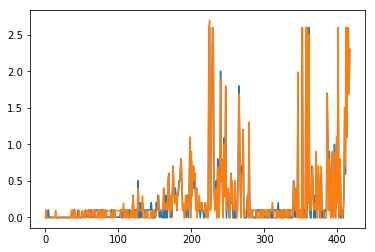

In [8]:
num_episodes = 1000

scores_deque = deque(maxlen=100)
scores = []
ave_scores = []
max_score = -np.Inf
for i_episode in range(num_episodes):
    score, steps = agent.steps()
    scores_deque.append(max(score))
    scores.append(score)
    ave_scores.append(np.array(scores_deque).mean())
    print("Eposode {}/ Score {} / Steps {}".format(i_episode,score, steps))
    if i_episode == 500:
        agent.add_noise_on_act(False)
        
    if i_episode > 100 and ave_scores[-1] > 0.5:
        print("Solved at epoch {} / average score {}".format(i_episode - 100, ave_scores[-1]))
        break

plt.plot(scores)

Save the trained model

In [9]:
agent.save_model()

Make a plot.

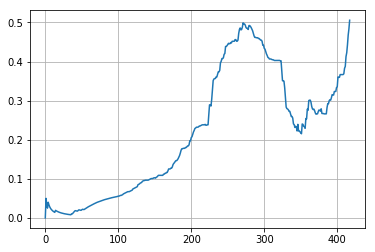

In [10]:
plt.plot(ave_scores)
plt.grid(True)

### 5. Let's see how the trained model works.

In [11]:
from model import Actor

checkpoint = torch.load("checkpoint.pth")
trained_model = Actor(checkpoint["state_size"],
                      checkpoint["action_size"],
                      2,
                      checkpoint["hidden_layers"])
trained_model.load_state_dict(checkpoint["state_dict"])

In [12]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment    
states = np.array(env_info.vector_observations)    # get the current state
states = torch.from_numpy(states).float().to("cpu")
scores = np.zeros(num_agents)       # initialize the score (for each agent)
trained_model.eval()                # set train= False
while True:
    with torch.no_grad():
        actions = trained_model(states).cpu().data.numpy()
    env_info = env.step(actions)[brain_name]
    next_states = np.array(env_info.vector_observations)
    rewards = env_info.rewards
    dones = env_info.local_done
    scores += env_info.rewards
    states = torch.from_numpy(next_states).float().to("cpu")
    if np.any(dones):
        break
        
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 2.600000038743019
